In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from lib.grid import Grid
from lib.fiber import GrinFiber
from lib.speckle import GrinSpeckle
from lib.transforms import fresnel_transform, fourier_transform

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


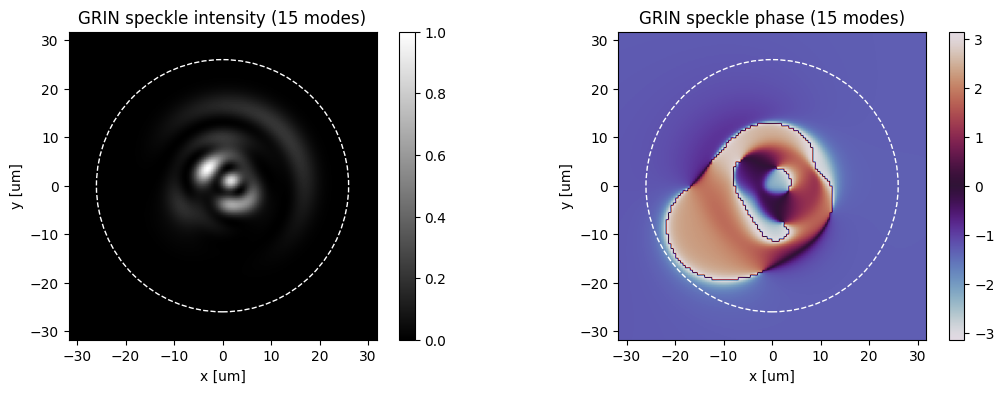

In [54]:
grid = Grid(pixel_size=0.5e-6)
fiber = GrinFiber()
speckle = GrinSpeckle(fiber, grid, N_modes=15)
speckle.compose()
_ = speckle.plot(complex=True)

Energies:
 - Initial: 0.9999999999967805
  - Fresnel: 0.9999999991772517
  - Fourier: 0.9999999999947562



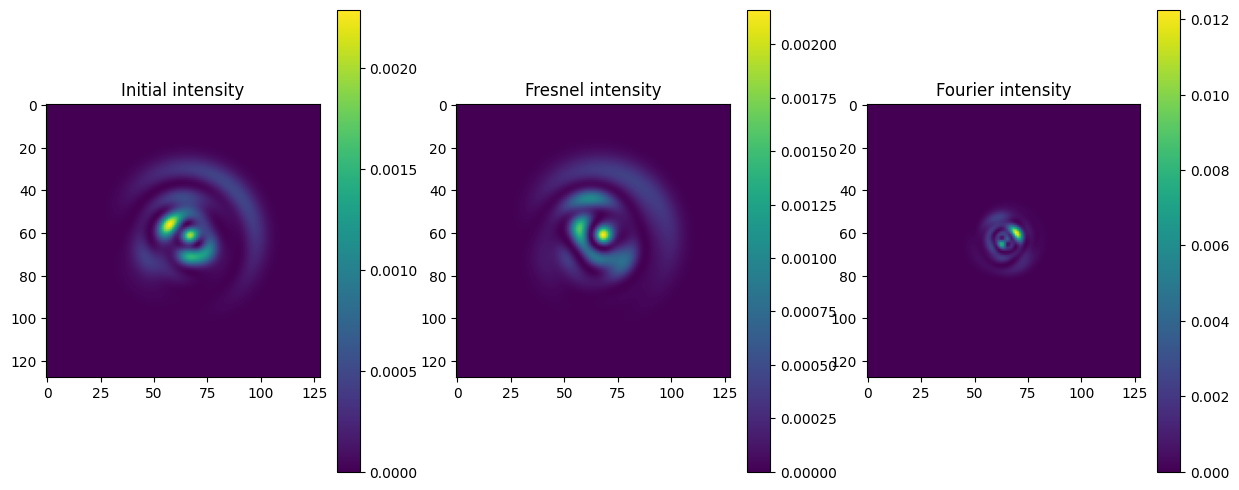

In [62]:
field = speckle.field
fres = fresnel_transform(field, grid, delta_z=100e-6, pad=2)
four = fourier_transform(field, pad=8)

print("Energies:\n"
      f" - Initial: {np.sum(np.abs(field)**2)}\n",
      f" - Fresnel: {np.sum(np.abs(fres)**2)}\n",
      f" - Fourier: {np.sum(np.abs(four)**2)}\n",
)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
pl0 = axs[0].imshow(np.square(np.abs(field)))
axs[0].set_title("Initial intensity")
plt.colorbar(pl0, ax=axs[0])
pl1 = axs[1].imshow(np.square(np.abs(fres)))
axs[1].set_title("Fresnel intensity")
plt.colorbar(pl1, ax=axs[1])
pl2 = axs[2].imshow(np.square(np.abs(four)))
axs[2].set_title("Fourier intensity")
plt.colorbar(pl2, ax=axs[2])
plt.show()